Kathryn Brusewitz

# Attribute Selection and PCA

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt  

import statsmodels.api as sm

import math
import time


/Users/kathryn/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/kathryn/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1 Active Data Exploration

## 1.1 Load and Explain the data

In [2]:
# Load the data
bdata = load_boston()

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)


In [4]:
boston = pd.DataFrame(bdata.data, columns = bdata.feature_names)
# print(boston)
boston['MEDV'] = bdata.target
display(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive

Attribute Information (in order)
```
- CRIM     per capita crime rate by town
            [numerical]
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
            [numerical]
- INDUS    proportion of non-retail business acres per town 
            [numerical]
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
            [categorical]
- NOX      nitric oxides concentration (parts per 10 million)
            [numerical]
- RM       average number of rooms per dwelling
            [numerical]
- AGE      proportion of owner-occupied units built prior to 1940
            [numerical]
- DIS      weighted distances to five Boston employment centres
            [numerical]
- RAD      index of accessibility to radial highways
            [numerical]
- TAX      full-value property-tax rate per 10,000 USD
            [numerical]
- PTRATIO  pupil-teacher ratio by town
            [numerical]
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
            [numerical]
- LSTAT    % lower status of the population
            [numerical]
- MEDV     Median value of owner-occupied homes in 1000's USD
            [numerical]
```

## 1.2 Add ~10 Engineered Features

In [5]:
boston['A1'] = boston['CRIM'] ** 2
boston['A2'] = boston['ZN'] * 100
boston['A3'] = boston['INDUS'] / boston['TAX']
boston['A4'] = boston['NOX'] ** 0.5
boston['A5'] = boston['RM'] * boston['RAD']
boston['A6'] = boston['DIS'] - boston['CRIM']
boston['A7'] = boston['RAD'] ** 3
boston['A8'] = boston['TAX'] / 100
boston['A9'] = boston['B'] ** boston['NOX']
boston['A10'] = boston['DIS'] + 10

In [6]:
display(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,0.000040,1800.0,0.007804,0.733485,6.575,4.08368,1.0,2.96,25.008661,14.0900
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.000746,0.0,0.029215,0.684836,12.842,4.93979,8.0,2.42,16.549369,14.9671
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,0.000745,0.0,0.029215,0.684836,14.370,4.93981,8.0,2.42,16.469559,14.9671
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,0.001048,0.0,0.009820,0.676757,20.994,6.02983,27.0,2.22,15.454504,16.0622
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,0.004768,0.0,0.009820,0.676757,21.441,5.99315,27.0,2.22,15.495156,16.0622
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,...,0.000891,0.0,0.009820,0.676757,19.290,6.03235,27.0,2.22,15.445353,16.0622
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,...,0.007795,1250.0,0.025305,0.723878,30.060,5.47221,125.0,3.11,22.959493,15.5605
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,...,0.020895,1250.0,0.025305,0.723878,30.860,5.80595,125.0,3.11,22.998997,15.9505
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,...,0.044622,1250.0,0.025305,0.723878,28.155,5.87086,125.0,3.11,22.685213,16.0821
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,...,0.028914,1250.0,0.025305,0.723878,30.020,6.42206,125.0,3.11,22.687673,16.5921


## 1.3 Add ~10 Bogus Features

In [7]:
rows = len(boston['CRIM'])
boston['B1'] = np.random.uniform(low=0.5, high=13.3, size=(rows,))
boston['B2'] = np.round(np.random.uniform(low=25, high=1837, size=(rows,)), 2)
boston['B3'] = np.round(np.random.uniform(low=0.0, high=1.0, size=(rows,)))
boston['B4'] = np.random.random_sample((rows,))
boston['B5'] = np.random.ranf((rows,)) * 100
boston['B6'] = np.random.randint(5, 400 + 1, size=(rows,))
boston['B7'] = np.random.uniform(low=10, high=15, size=(rows,))
boston['B8'] = np.round(np.random.uniform(low=0, high=1, size=(rows,)), 2)
boston['B9'] = np.random.randint(10000, 100000 + 1, size=(rows,))
boston['B10'] = np.round(np.random.uniform(low=0, high=2, size=(rows,)), 2)

In [8]:
display(boston)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,6.008472,1255.59,1.0,0.038024,78.074713,283,12.033240,0.99,38540,0.29
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,0.884539,46.03,1.0,0.046991,82.697844,175,14.779326,0.44,60145,1.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,4.143474,345.25,1.0,0.048190,3.242829,201,10.758225,0.47,87672,0.89
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,1.017907,1801.65,0.0,0.351102,89.139441,115,13.946753,0.47,13079,1.28
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,6.129447,797.19,1.0,0.685332,21.087689,278,12.977492,0.88,25394,0.90
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,...,6.866149,675.54,0.0,0.811632,17.285305,373,14.340333,0.57,22300,0.57
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,...,11.827692,1312.73,0.0,0.866546,11.015929,134,12.455321,0.37,27241,0.42
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,...,12.454021,248.46,0.0,0.968064,11.066015,361,12.238838,0.58,93002,0.69
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,...,5.226959,1056.92,0.0,0.715509,56.984738,240,13.307645,0.40,20208,0.86
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,...,2.357082,1516.59,1.0,0.967504,23.605095,12,13.487154,0.69,24609,0.52


## 1.4 Summary Table

In [9]:
summary = boston.describe().T
summary.drop(summary.columns[[4, 5, 6]], axis=1, inplace=True)
summary['corr'] = [0.0] * len(summary['count'])

for name in boston.columns:
    summary['corr'][name] = pd.Series.corr(boston[name], boston['MEDV'])

summary

,count,mean,std,min,max,corr
CRIM,506.0,3.593761,8.596783,0.006320,88.976200,-0.385832
ZN,506.0,11.363636,23.322453,0.000000,100.000000,0.360445
INDUS,506.0,11.136779,6.860353,0.460000,27.740000,-0.483725
CHAS,506.0,0.069170,0.253994,0.000000,1.000000,0.175260
NOX,506.0,0.554695,0.115878,0.385000,0.871000,-0.427321
RM,506.0,6.284634,0.702617,3.561000,8.780000,0.695360
AGE,506.0,68.574901,28.148861,2.900000,100.000000,-0.376955
DIS,506.0,3.795043,2.105710,1.129600,12.126500,0.249929
RAD,506.0,9.549407,8.707259,1.000000,24.000000,-0.381626
TAX,506.0,408.237154,168.537116,187.000000,711.000000,-0.468536


## 1.5 Graphical exploration

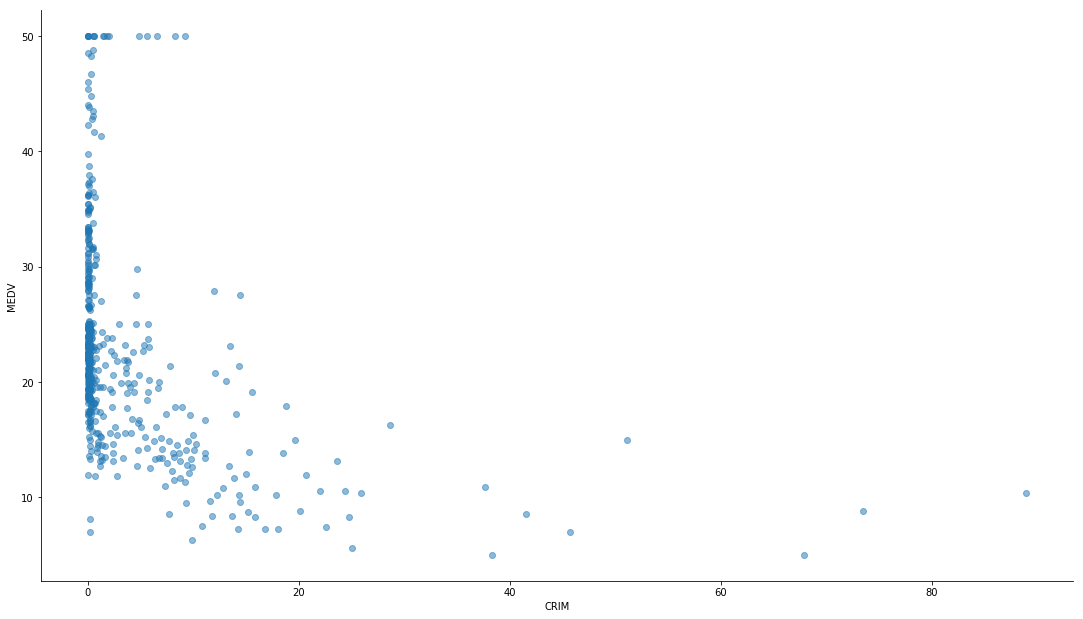

In [10]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

name = 'CRIM'

plt.plot(boston[[name]], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel(name)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

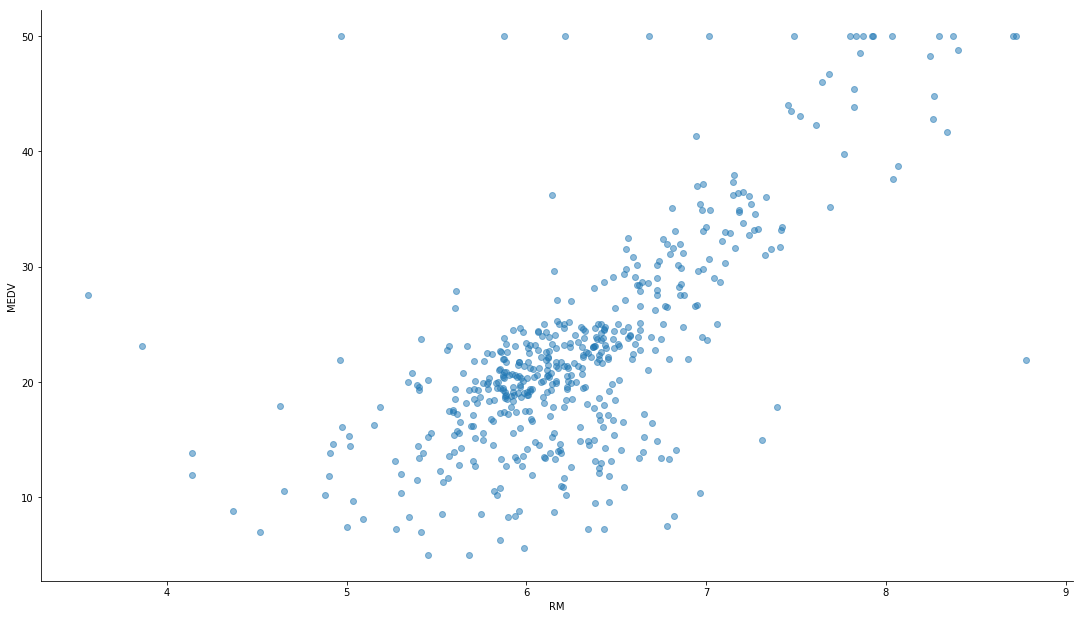

In [11]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

name = 'RM'

plt.plot(boston[[name]], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel(name)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

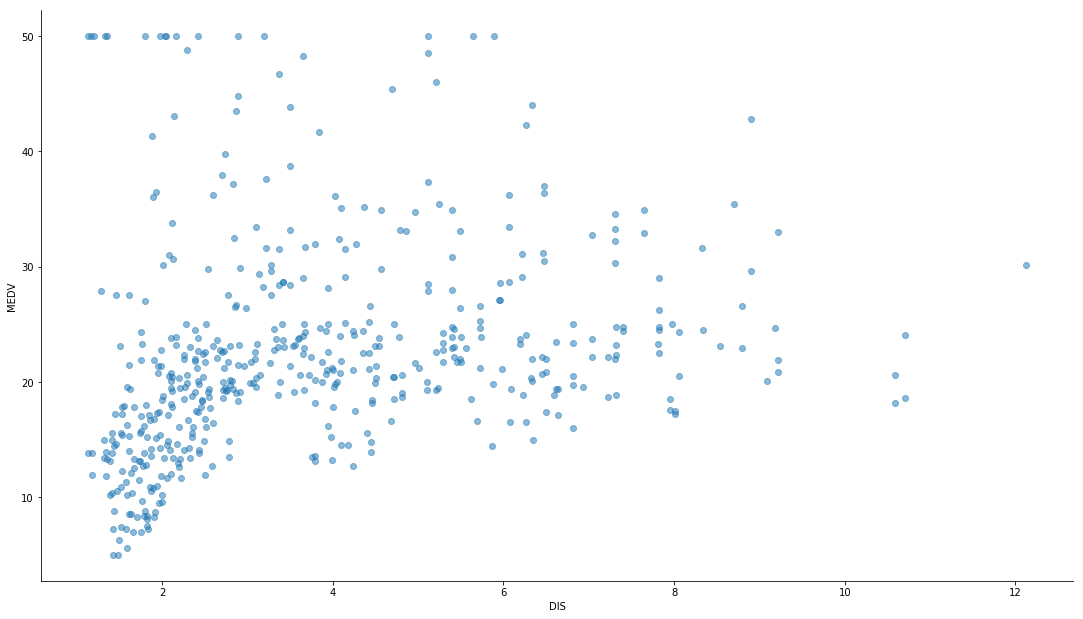

In [12]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

name = 'DIS'

plt.plot(boston[[name]], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel(name)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

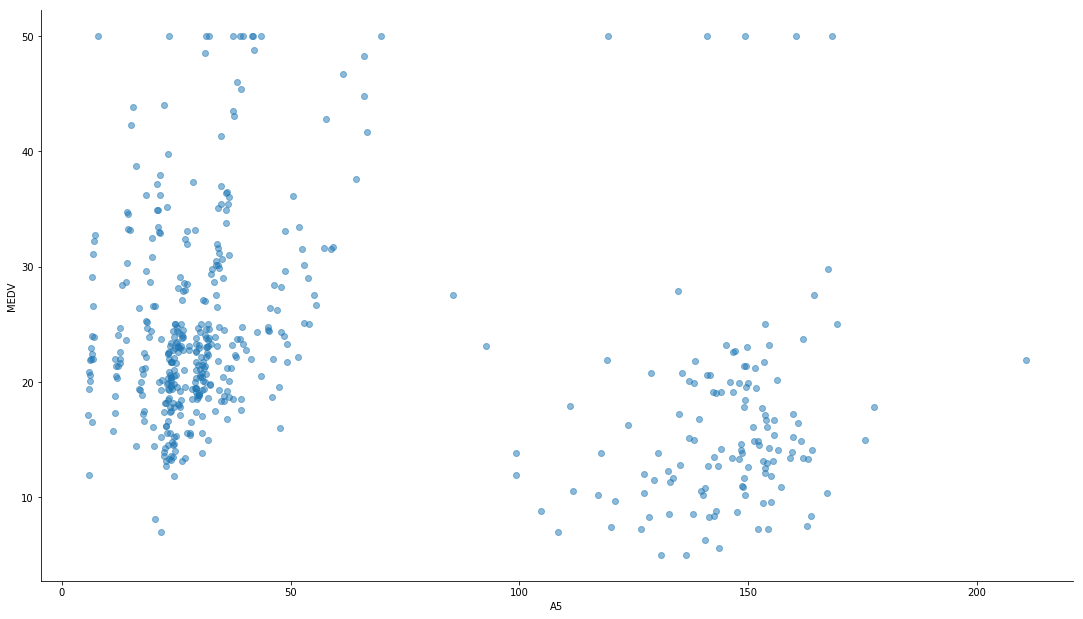

In [13]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

name = 'A5'

plt.plot(boston[[name]], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel(name)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

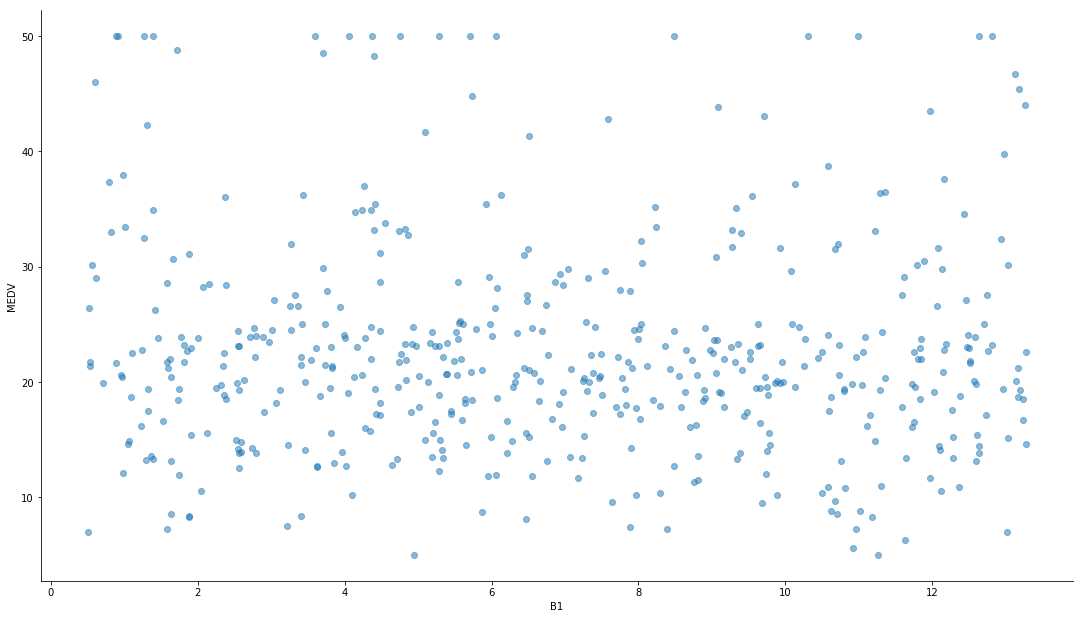

In [14]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

name = 'B1'

plt.plot(boston[[name]], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel(name)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

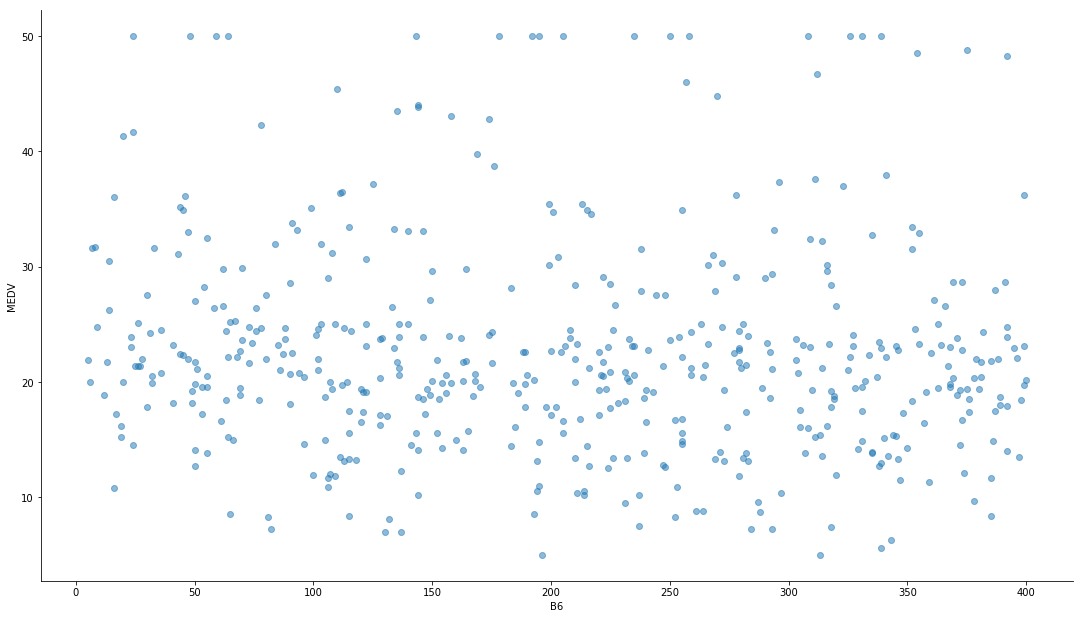

In [15]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

name = 'B6'

plt.plot(boston[[name]], boston[['MEDV']], 'o', alpha=0.5)
plt.ylabel('MEDV')
plt.xlabel(name)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# 2 Warm-up: A few models

## 2.1 Loss function

In [16]:
def MSE(lm, x, y):
    return np.square(y - lm.predict(x)).mean()

## 2.2 Some regressions

### 2.2.1 Create small model

In [17]:
x = boston[['CRIM']]
y = boston['MEDV']

lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 2.2.2 10-fold cross-validate

In [18]:
scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
print(scores)

print('10-fold MSE score: ', scores.mean()) # 77.69

[  47.5065087    26.96062463   45.79534319  167.8967778    89.59115588
  147.28144563   21.26305107  135.21275971   59.670526     35.70121519]
10-fold MSE score:  77.6879407813


### 2.2.3 Model with 10 features

In [19]:
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'A1', 'A2', 'A3', 'B1', 'B2', 'B3']]
y = boston['MEDV']

lm = LinearRegression()
lm.fit(x, y)

scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
print(scores)

print('10-fold MSE score: ', scores.mean()) # 67.08


[  55.28727652   35.24370543   21.45557704  145.59488014   81.48280931
  116.01388853   41.14299069  130.20644083   29.11059231   21.37035598]
10-fold MSE score:  67.6908516776


### 2.2.4 All Features

In [20]:
x = boston[boston.columns]
x = x.drop(['MEDV'], axis=1)
y = boston['MEDV']


lm = LinearRegression()
lm.fit(x, y)

scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
print(scores)

print('10-fold MSE score: ', scores.mean()) # 30.07


[  10.2145846    10.25179291   66.29692735   25.12634997   22.86057972
   13.12720164    7.82328439  121.55134389   17.63889238   13.16826103]
10-fold MSE score:  30.8059217884


### 2.2.5 Results

Using all features yielded an MSE score of 30.07. This performs best of all the models, because the closer MSE is to zero, the more accurate the estimator predicts observations.

# 3 Find the best model

## 3.1 Can we evaluate all models?

### 3.1.1

How many different linear regression models can you build based on the features you have (including the ones you generated)?

We have 33 features. We calculate the total number of linear regression model combinations with 33 factorial...

In [21]:
print('Number of possible models: ', math.factorial(33))

Number of possible models:  8683317618811886495518194401280000000


### 3.1.2

In [22]:
allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)

i = 0
iterations = 250

print('Please wait...')

startTime = time.time()

while i < iterations :
    rangeFeatures = np.arange(0, 33)
    shuffledOrder = np.random.choice(rangeFeatures, size=33, replace=False)
    numFeatures = np.random.randint(low=1, high=34)
    pickedFeatures = shuffledOrder[0:numFeatures]

    x = allFeatures.iloc[:, pickedFeatures]
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)

    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()

    # print('10-fold MSE score: ', scoresMean) 
    
    i = i + 1
endTime = time.time()
print('Done!')
print("Total time taken: ", endTime - startTime)

Please wait...
Done!
Total time taken:  5.4983179569244385


### 3.1.3

For 250 iterations, it took 5.5 seconds.

For 33! iterations, it will probably take forever.

In [23]:
print('It will take ', ((5.5/250) * math.factorial(33)) / 31540000, ' years.')

It will take  6.056848053705184e+27  years.


## 3.2 Forward Selection

### 3.2.1

Read Whitten, Frank, Hall Ch 7, particularly section 7.1 (attribute selection)

### 3.2.2 

Create a series of 1-feature models and pick the best one by 10-fold CV.

Note: always include the constant.

In [24]:
allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = allFeatures.columns

i = 0
maxFeatures = 33
bestMean = 0
bestFeature = ''

while i < maxFeatures :
    x = allFeatures.iloc[:, i].values.reshape(-1, 1)
    y = boston['MEDV']
    
    lm = LinearRegression()
    lm.fit(x, y)
    
    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 0):
        bestMean = scoresMean
        bestFeature = featureNames[i]
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            bestFeature = featureNames[i]

    i = i + 1

print('Lowest Loss: ', bestMean)
print('Feature: ', bestFeature)


Lowest Loss:  41.8289580722
Feature:  LSTAT


### 3.2.3

My 1-feature model is LSTAT with loss of 41.8289580722

### 3.2.4

Repeat the procedure with more features until the loss does not improve any more. This is your
forward-selection model.

In [27]:
# RANDOM METHOD: Shuffles the order of features
# I am doing it two different ways because I don't know which one is the correct method for forward-selection

allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = allFeatures.columns

i = 1
maxFeatures = 33
rangeFeatures = np.arange(0, 33)

bestMean = 0
numFeatures = 0

while i < maxFeatures :
    shuffledOrder = np.random.choice(rangeFeatures, size=33, replace=False)
    pickedFeatures = shuffledOrder[0:i]
    
    x = allFeatures.iloc[:, pickedFeatures]
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)

    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 1):
        bestMean = scoresMean
        numFeatures = i + 1
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            numFeatures = i + 1
    
    i = i + 1

print('Lowest loss: ', bestMean)
print('Number of features: ', numFeatures)

Lowest loss:  26.3227783453
Number of features:  27


In [28]:
# NON-RANDOM METHOD: Goes through features left to right
# I am doing it two different ways because I don't know which one is the correct method for forward-selection

allFeatures = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = allFeatures.columns

i = 1
maxFeatures = 33
bestMean = 0
numFeatures = 0

while i < maxFeatures :    
    x = allFeatures.iloc[:, 0:i]
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)

    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 1):
        bestMean = scoresMean
        numFeatures = i + 1
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            numFeatures = i + 1
    
    i = i + 1

print('Lowest loss: ', bestMean)
print('Number of features: ', numFeatures)

Lowest loss:  29.8136567449
Number of features:  25


If I go with the my non-random method, then my forward selection model is the first 26 features.

# 4 Principal Components

## 4.1 Use raw features (no normalization)

### 4.1.1

Consult Whitten, Frank, Hall, in particular section 7.3.

### 4.1.2

Perform Principal Component Analysis on all the features in your data (except the price, `medv`).

Extract all components (the number should equal the number of features) and report:
1. Variance explained by each component
2. Proportional variance explained by each component
3. Cumulative variance explained up to each component

In [29]:
x = boston[boston.columns].drop(['MEDV'], axis=1)
featureNames = x.columns

m = PCA().fit(x)

pcaSummary = pd.DataFrame(m.explained_variance_, columns = ['explained_variance'], index=featureNames)
pcaSummary['variance_ratio'] = m.explained_variance_ratio_
pcaSummary['cum_variance_ratio'] = np.cumsum(m.explained_variance_ratio_)
pcaSummary['singular_values'] = m.singular_values_

display(pcaSummary)


,explained_variance,variance_ratio,cum_variance_ratio,singular_values
CRIM,6.613142e+08,9.398739e-01,0.939874,5.778959e+05
ZN,3.685713e+07,5.238214e-02,0.992256,1.364289e+05
INDUS,4.905809e+06,6.972240e-03,0.999228,4.977382e+04
CHAS,2.770286e+05,3.937190e-04,0.999622,1.182791e+04
NOX,2.396775e+05,3.406348e-04,0.999963,1.100169e+04
RM,1.266533e+04,1.800024e-05,0.999981,2.529030e+03
AGE,6.772201e+03,9.624797e-06,0.999990,1.849314e+03
DIS,4.778020e+03,6.790624e-06,0.999997,1.553351e+03
RAD,8.147641e+02,1.157960e-06,0.999998,6.414483e+02
TAX,7.010978e+02,9.964152e-07,0.999999,5.950247e+02


### 4.1.3

Rotate data: rotate the original features according to the principal components.

In [30]:
# Use original features
originalX = pd.DataFrame(bdata.data, columns = bdata.feature_names)
featureNames = originalX.columns

m = PCA().fit(originalX)

pcaSummary = pd.DataFrame(m.explained_variance_, columns = ['explained_variance'], index=featureNames)
pcaSummary['variance_ratio'] = m.explained_variance_ratio_
pcaSummary['cum_variance_ratio'] = np.cumsum(m.explained_variance_ratio_)
pcaSummary['singular_values'] = m.singular_values_

display(pcaSummary)

,explained_variance,variance_ratio,cum_variance_ratio,singular_values
CRIM,30889.518211,8.058146e-01,0.805815,3949.583104
ZN,6250.274010,1.630509e-01,0.968865,1776.622744
INDUS,818.365244,2.134869e-02,0.990214,642.864253
CHAS,266.683023,6.956958e-03,0.997171,366.980826
NOX,50.134704,1.307864e-03,0.998479,159.116390
RM,27.896767,7.277428e-04,0.999207,118.692322
AGE,16.100905,4.200242e-04,0.999627,90.171821
DIS,9.534310,2.487215e-04,0.999875,69.388953
RAD,3.273295,8.539042e-05,0.999961,40.657274
TAX,1.181087,3.081102e-05,0.999992,24.422309


Variance by variable:
 [  3.08284717e+04   6.23792169e+03   8.16747922e+02   2.66155981e+02
   5.00356236e+01   2.78416349e+01   1.60690855e+01   9.51546794e+00
   3.26682587e+00   1.17875328e+00   2.54601972e-01   5.99823841e-02
   3.04748580e-03]


/Users/kathryn/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


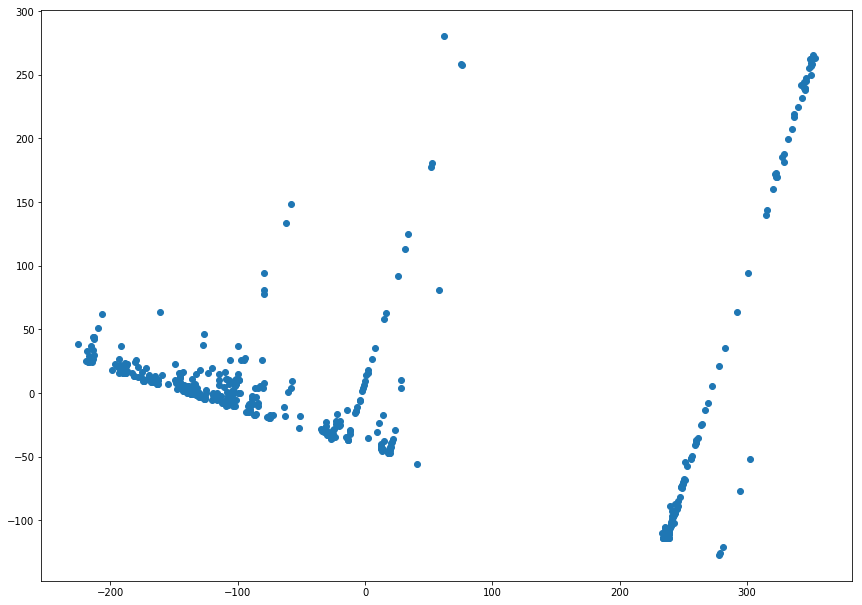

In [31]:
originalX = pd.DataFrame(bdata.data, columns = bdata.feature_names)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

dataRot = PCA().fit_transform(originalX)
plt.scatter(dataRot[:,0], dataRot[:,1])
plt.axes().set_aspect("equal")

print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))

### 4.1.4

Find the optimal model in rotated data: estimate the regression model explaining the housing value by the rotated features. Start with the first (most important) rotated feature and add rotated features to the model one-by-one. Each time cross-validate your result. Stop where the cross-validation score starts to deteriorate.

In [45]:
# Highest explained variance

i = 0
maxFeatures = 13
bestMean = 0
feature = 0

while i < maxFeatures :    
    x = dataRot[:, i].reshape(-1,1)
    y = boston['MEDV']

    lm = LinearRegression()
    lm.fit(x, y)
    
    scores = cross_val_score(lm, x, y, cv=10, scoring=MSE)
    scoresMean = scores.mean()
    
    if (i == 0):
        bestMean = scoresMean
        feature = i
    else:
        if (scoresMean < bestMean):
            bestMean = scoresMean
            feature = i
    
    i = i + 1

print('Lowest loss: ', bestMean)
print('Best feature: ', featureNames[feature])

Lowest loss:  56.7164900608
Best feature:  CRIM


## 4.2 PCA on normalized data

### 4.2.1

In [46]:
# Normalization function, given feature vector x
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

In [47]:
# Apply to all explanatory variables

originalX2 = pd.DataFrame(bdata.data, columns = bdata.feature_names)

for name in originalX2.columns:
    originalX2[name] = normalize(originalX2[name])

originalX2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
5,-0.414974,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032,0.410571,-1.043322
6,-0.408169,0.048772,-0.476654,-0.272599,-0.265154,-0.388411,-0.070229,0.839244,-0.523001,-0.577519,-1.505237,0.426798,-0.031268
7,-0.401618,0.048772,-0.476654,-0.272599,-0.265154,-0.160466,0.978808,1.024638,-0.523001,-0.577519,-1.505237,0.441052,0.910700
8,-0.393853,0.048772,-0.476654,-0.272599,-0.265154,-0.931206,1.117494,1.087196,-0.523001,-0.577519,-1.505237,0.328448,2.421774
9,-0.398650,0.048772,-0.476654,-0.272599,-0.265154,-0.399808,0.616090,1.329635,-0.523001,-0.577519,-1.505237,0.329325,0.623344


### 4.2.2

Repeat the analysis in 4.1 with normalized data.

,explained_variance,variance_ratio,cum_variance_ratio,singular_values
CRIM,6.134779,0.470973,0.470973,55.660249
ZN,1.434899,0.110159,0.581132,26.918842
INDUS,1.243621,0.095474,0.676606,25.060496
CHAS,0.859498,0.065985,0.742591,20.833777
NOX,0.836219,0.064197,0.806788,20.549708
RM,0.660957,0.050742,0.857531,18.269734
AGE,0.540085,0.041463,0.898993,16.514928
DIS,0.397329,0.030503,0.929497,14.165145
RAD,0.277984,0.021341,0.950838,11.848295
TAX,0.220696,0.016943,0.967781,10.557057


Variance by variable:
 [ 6.12265476  1.43206335  1.24116299  0.85779892  0.83456618  0.65965056
  0.53901749  0.39654415  0.27743495  0.22025981  0.18616388  0.16916744
  0.06351553]


/Users/kathryn/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


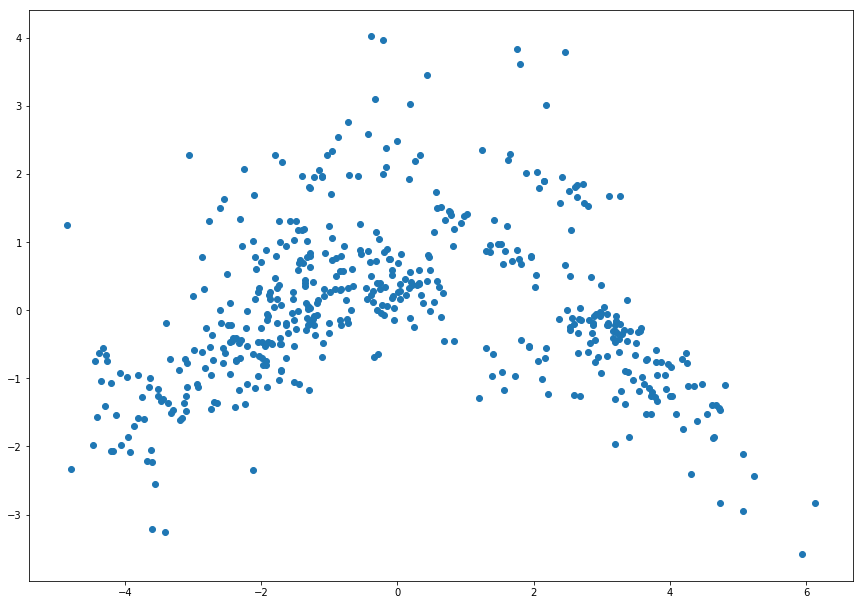

In [48]:
featureNames = originalX2.columns

m = PCA().fit(originalX2)

pcaSummary = pd.DataFrame(m.explained_variance_, columns = ['explained_variance'], index=featureNames)
pcaSummary['variance_ratio'] = m.explained_variance_ratio_
pcaSummary['cum_variance_ratio'] = np.cumsum(m.explained_variance_ratio_)
pcaSummary['singular_values'] = m.singular_values_

display(pcaSummary)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

dataRot = PCA().fit_transform(originalX2)
plt.scatter(dataRot[:,0], dataRot[:,1])
plt.axes().set_aspect("equal")

print("Variance by variable:\n", np.apply_along_axis(np.var, 0, dataRot))


## 4.3 What's the best solution?

Compare all your results: full model, forward selection, PCA on raw data, and PCA on normalized data.

Which one is the most precise?

Which one is the most compact? 

Which one is the easiest to do?

Which one is the most straightforward to interpret?

Most Precise: PCA on Raw Data.

Most Compact: PCA on Normalized Data.

Easiest to Do: PCA on Normalized Data, due to less lines to write and functions from libraries. The full model was also somewhat easy to do.

Straightforward Interpretation: PCA on Raw Data. For every feature, you can get the explained variance and cumulative variance and singular values.